In [56]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_excel('COVID-19-Constructed-Dataset-(PANEL).xlsx')

In [58]:
factors = ['school', 'gradelevel', 'gender', 'covidpos', 'householdincome', 'freelunch', 'numcomputers', 'familysize', 'fathereduc', 'mothereduc', 'timeperiod']

In [59]:
school = np.array(df['school'])
grade_level = np.array(df['gradelevel'])
gender = np.array(df['gender'])
covid_pos = np.array(df['covidpos'])
house_hold_income = np.array(df['householdincome'])
free_lunch = np.array(df['freelunch'])
num_computers = np.array(df['numcomputers'])
family_size = np.array(df['familysize'])
father_educ = np.array(df['fathereduc'])
mother_educ = np.array(df['mothereduc'])
time_period = np.array(df['timeperiod'])

reading_target = list(np.array(df['readingscore']))
writing_target = list(np.array(df['writingscore']))
math_target = list(np.array(df['mathscore']))
readingSL_target = list(np.array(df['readingscoreSL']))
writingSL_target = list(np.array(df['writingscoreSL']))
mathSL_target = list(np.array(df['mathscoreSL']))

In [60]:
print(f'school: {school}')
print(f'grade_level: {grade_level}')
print(f'gender: {gender}')
print(f'covid_pos: {covid_pos}')
print(f'house_hold_income: {house_hold_income}')
print(f'free_lunch: {free_lunch}')
print(f'num_computers: {num_computers}')
print(f'family_size: {family_size}')
print(f'father_educ: {father_educ}')
print(f'mother_educ: {mother_educ}')
print(f'time_period: {time_period}')

school: [0 0 0 ... 1 1 1]
grade_level: [ 6  6  6 ... 12 12 12]
gender: [1 1 1 ... 1 1 1]
covid_pos: [1 1 1 ... 1 1 1]
house_hold_income: [59065.13671875 59065.13671875 59065.13671875 ... 65783.6328125
 65783.6328125  65783.6328125 ]
free_lunch: [0 0 0 ... 1 1 1]
num_computers: [5 5 5 ... 2 2 2]
family_size: [3 3 3 ... 3 3 3]
father_educ: [1 1 1 ... 3 3 3]
mother_educ: [0 0 0 ... 3 3 3]
time_period: [2 4 1 ... 3 1 5]


# Training on all features

# Reading_score

In [61]:
data = list(zip(school, grade_level, gender, covid_pos, house_hold_income, free_lunch, num_computers, family_size, father_educ, mother_educ, time_period))


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

#READING SCORE
X_train, X_test, y_train, y_test = train_test_split(data, reading_target, test_size=0.20, random_state=42)

# depth values for tuning
depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# tune critereon
critereon_types = ['squared_error', 'friedman_mse', 'absolute_error']

param_grid = {
    'max_depth': depth_values,
    'criterion': critereon_types,
}

accuracy_scores = []
f1_scores = []
auc_scores = []


decision_tree_regressor = DecisionTreeRegressor()


grid_search = GridSearchCV(estimator=decision_tree_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, y_train)

# the best parameters and best score (neg_mean_squared_error)
print("Best parameters:", grid_search.best_params_)
print("Best neg_mean_squared_error score:", grid_search.best_score_)


grid_search = GridSearchCV(estimator=decision_tree_regressor, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters (R^2):", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)


Best parameters: {'criterion': 'squared_error', 'max_depth': 4}
Best neg_mean_squared_error score: -110.46968685510151
Best parameters (R^2): {'criterion': 'squared_error', 'max_depth': 4}
Best R^2 score: 0.37526863760698437


READING SCORE


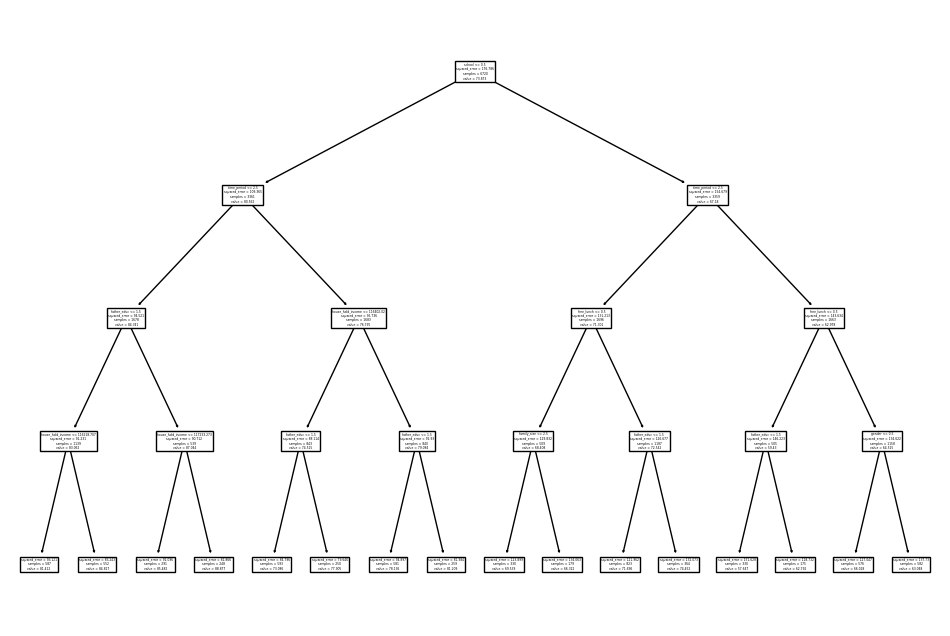

In [62]:
import matplotlib.pyplot as plt

print('READING SCORE')

# Using the best params to retrain on the training set and evaluating the test set
decision_tree_regressor_w_best_params = DecisionTreeRegressor(max_depth = 4, criterion = 'squared_error')

decision_tree_regressor_w_best_params.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(decision_tree_regressor_w_best_params, feature_names=[
    'school', 'grade_level', 'gender', 'covid_pos', 'house_hold_income', 'free_lunch', 
    'num_computers', 'family_size', 'father_educ', 'mother_educ', 'time_period'])
plt.savefig('decision_tree_plot_reading_score.png', format='png', dpi=300)
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# predictions on the test set
y_pred = decision_tree_regressor_w_best_params.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 111.12524445635907
Mean Absolute Error: 8.51976908336873
R² Score: 0.37062823031469994


# Writing_score

In [64]:
#WRITING SCORE
X_train, X_test, y_train, y_test = train_test_split(data, writing_target, test_size=0.20, random_state=42)

# depth values for tuning
depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# tune critereon
critereon_types = ['squared_error', 'friedman_mse', 'absolute_error']

param_grid = {
    'max_depth': depth_values,
    'criterion': critereon_types,
}

accuracy_scores = []
f1_scores = []
auc_scores = []


decision_tree_regressor = DecisionTreeRegressor()


grid_search = GridSearchCV(estimator=decision_tree_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, y_train)

# the best parameters and best score (neg_mean_squared_error)
print("Best parameters:", grid_search.best_params_)
print("Best neg_mean_squared_error score:", grid_search.best_score_)


grid_search = GridSearchCV(estimator=decision_tree_regressor, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters (R^2):", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)

Best parameters: {'criterion': 'squared_error', 'max_depth': 4}
Best neg_mean_squared_error score: -135.07326382600098
Best parameters (R^2): {'criterion': 'squared_error', 'max_depth': 4}
Best R^2 score: 0.3309831171653209


WRITING SCORE


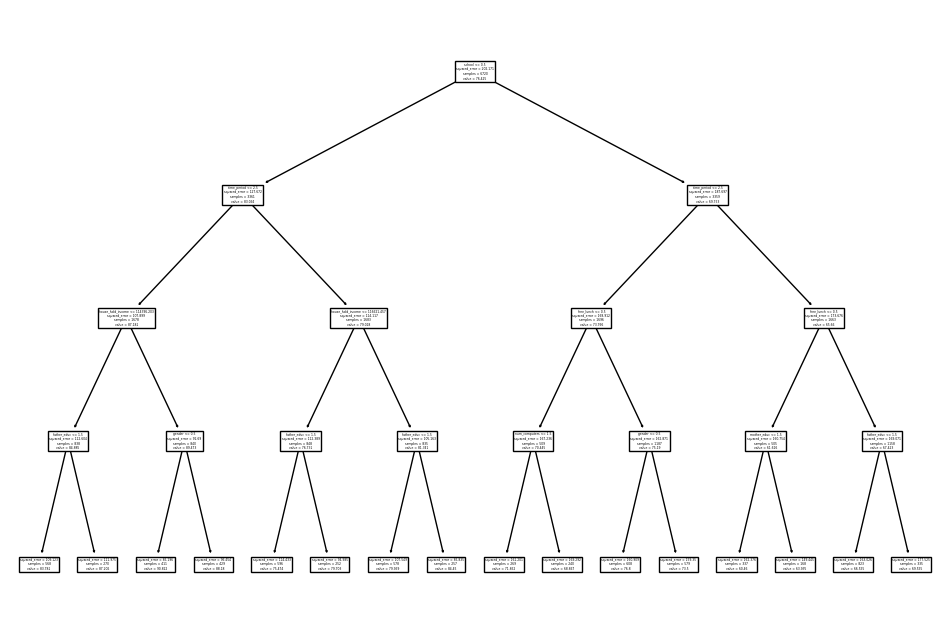

In [65]:
print('WRITING SCORE')

# Using the best params to retrain on the training set and evaluating the test set
decision_tree_regressor_w_best_params = DecisionTreeRegressor(max_depth = 4, criterion = 'squared_error')

decision_tree_regressor_w_best_params.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(decision_tree_regressor_w_best_params, feature_names=[
    'school', 'grade_level', 'gender', 'covid_pos', 'house_hold_income', 'free_lunch', 
    'num_computers', 'family_size', 'father_educ', 'mother_educ', 'time_period'])
plt.savefig('decision_tree_plot_writing_score.png', format='png', dpi=300)

In [66]:
# predictions on the test set
y_pred = decision_tree_regressor_w_best_params.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 128.85658451865356
Mean Absolute Error: 9.589160220786146
R² Score: 0.3361492072338541


# Math_score

In [67]:
#MATH SCORE
X_train, X_test, y_train, y_test = train_test_split(data, math_target, test_size=0.20, random_state=42)

# depth values for tuning
depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# tune critereon
critereon_types = ['squared_error', 'friedman_mse', 'absolute_error']

param_grid = {
    'max_depth': depth_values,
    'criterion': critereon_types,
}

accuracy_scores = []
f1_scores = []
auc_scores = []


decision_tree_regressor = DecisionTreeRegressor()


grid_search = GridSearchCV(estimator=decision_tree_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, y_train)

# the best parameters and best score (neg_mean_squared_error)
print("Best parameters:", grid_search.best_params_)
print("Best neg_mean_squared_error score:", grid_search.best_score_)


grid_search = GridSearchCV(estimator=decision_tree_regressor, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters (R^2):", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)

Best parameters: {'criterion': 'squared_error', 'max_depth': 4}
Best neg_mean_squared_error score: -132.04015084174273
Best parameters (R^2): {'criterion': 'squared_error', 'max_depth': 4}
Best R^2 score: 0.24778560811373537


MATH SCORE


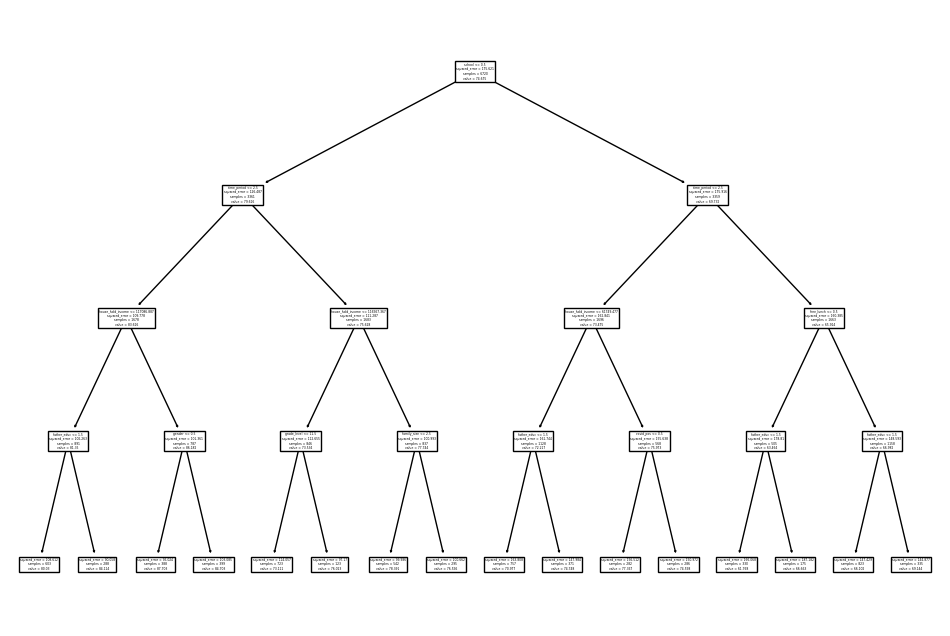

In [68]:
print('MATH SCORE')

# Using the best params to retrain on the training set and evaluating the test set
decision_tree_regressor_w_best_params = DecisionTreeRegressor(max_depth = 4, criterion = 'squared_error')

decision_tree_regressor_w_best_params.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(decision_tree_regressor_w_best_params, feature_names=[
    'school', 'grade_level', 'gender', 'covid_pos', 'house_hold_income', 'free_lunch', 
    'num_computers', 'family_size', 'father_educ', 'mother_educ', 'time_period'])
plt.savefig('decision_tree_plot_math_score.png', format='png', dpi=300)

In [69]:
# predictions on the test set
y_pred = decision_tree_regressor_w_best_params.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 131.19203406894133
Mean Absolute Error: 9.538317635401365
R² Score: 0.2685950819893731


# ReadingSL

In [70]:
#READING_SL SCORE
X_train, X_test, y_train, y_test = train_test_split(data, readingSL_target, test_size=0.20, random_state=42)

# depth values for tuning
depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# tune critereon
critereon_types = ['squared_error', 'friedman_mse', 'absolute_error']

param_grid = {
    'max_depth': depth_values,
    'criterion': critereon_types,
}

accuracy_scores = []
f1_scores = []
auc_scores = []


decision_tree_regressor = DecisionTreeRegressor()


grid_search = GridSearchCV(estimator=decision_tree_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, y_train)

# the best parameters and best score (neg_mean_squared_error)
print("Best parameters:", grid_search.best_params_)
print("Best neg_mean_squared_error score:", grid_search.best_score_)


grid_search = GridSearchCV(estimator=decision_tree_regressor, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters (R^2):", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)

Best parameters: {'criterion': 'squared_error', 'max_depth': 4}
Best neg_mean_squared_error score: -122.273632724441
Best parameters (R^2): {'criterion': 'squared_error', 'max_depth': 4}
Best R^2 score: 0.3157031095115294


READING SL SCORE


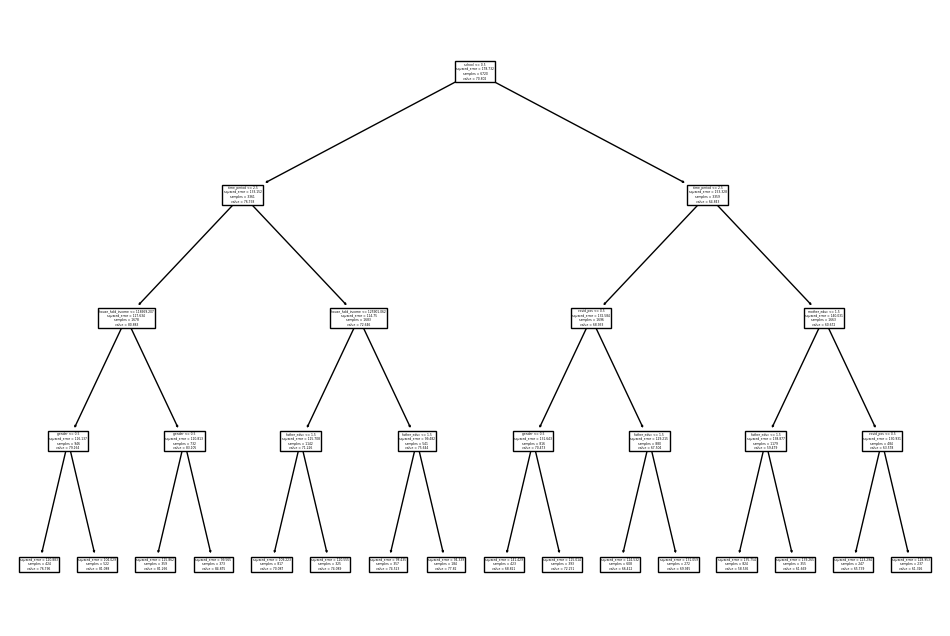

In [71]:
print('READING SL SCORE')

# Using the best params to retrain on the training set and evaluating the test set
decision_tree_regressor_w_best_params = DecisionTreeRegressor(max_depth = 4, criterion = 'squared_error')

decision_tree_regressor_w_best_params.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(decision_tree_regressor_w_best_params, feature_names=[
    'school', 'grade_level', 'gender', 'covid_pos', 'house_hold_income', 'free_lunch', 
    'num_computers', 'family_size', 'father_educ', 'mother_educ', 'time_period'])
plt.savefig('decision_tree_plot_readingSL_score.png', format='png', dpi=300)

In [72]:
# predictions on the test set
y_pred = decision_tree_regressor_w_best_params.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 123.37557184105555
Mean Absolute Error: 8.838764176599055
R² Score: 0.32949917073762736


# WRITING SL

In [73]:
#WRITING SL SCORE
X_train, X_test, y_train, y_test = train_test_split(data, writingSL_target, test_size=0.20, random_state=42)

# depth values for tuning
depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# tune critereon
critereon_types = ['squared_error', 'friedman_mse', 'absolute_error']

param_grid = {
    'max_depth': depth_values,
    'criterion': critereon_types,
}

accuracy_scores = []
f1_scores = []
auc_scores = []


decision_tree_regressor = DecisionTreeRegressor()


grid_search = GridSearchCV(estimator=decision_tree_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, y_train)

# the best parameters and best score (neg_mean_squared_error)
print("Best parameters:", grid_search.best_params_)
print("Best neg_mean_squared_error score:", grid_search.best_score_)


grid_search = GridSearchCV(estimator=decision_tree_regressor, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters (R^2):", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)

Best parameters: {'criterion': 'squared_error', 'max_depth': 4}
Best neg_mean_squared_error score: -132.68449004927095
Best parameters (R^2): {'criterion': 'squared_error', 'max_depth': 4}
Best R^2 score: 0.26287622776668607


WRITING SL SCORE


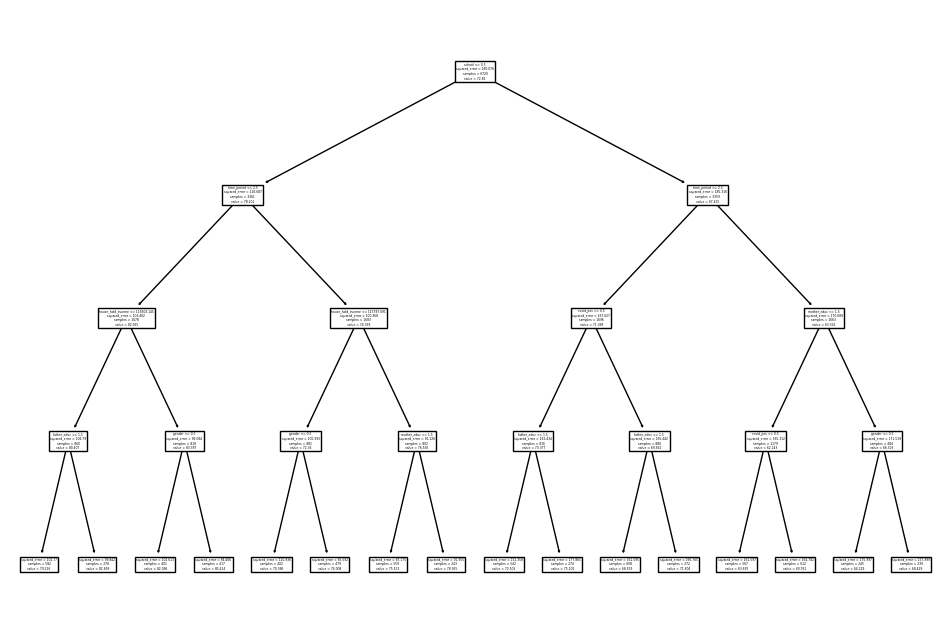

In [74]:
print('WRITING SL SCORE')

# Using the best params to retrain on the training set and evaluating the test set
decision_tree_regressor_w_best_params = DecisionTreeRegressor(max_depth = 4, criterion = 'squared_error')

decision_tree_regressor_w_best_params.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(decision_tree_regressor_w_best_params, feature_names=[
    'school', 'grade_level', 'gender', 'covid_pos', 'house_hold_income', 'free_lunch', 
    'num_computers', 'family_size', 'father_educ', 'mother_educ', 'time_period'])
plt.savefig('decision_tree_plot_writingSL_score.png', format='png', dpi=300)

In [75]:
# predictions on the test set
y_pred = decision_tree_regressor_w_best_params.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 120.88310940445149
Mean Absolute Error: 8.835947857493764
R² Score: 0.2764624911184026


# MATH SL 

In [76]:
#MATH SL SCORE
X_train, X_test, y_train, y_test = train_test_split(data, mathSL_target, test_size=0.20, random_state=42)

# depth values for tuning
depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# tune critereon
critereon_types = ['squared_error', 'friedman_mse', 'absolute_error']

param_grid = {
    'max_depth': depth_values,
    'criterion': critereon_types,
}

accuracy_scores = []
f1_scores = []
auc_scores = []


decision_tree_regressor = DecisionTreeRegressor()


grid_search = GridSearchCV(estimator=decision_tree_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, y_train)

# the best parameters and best score (neg_mean_squared_error)
print("Best parameters:", grid_search.best_params_)
print("Best neg_mean_squared_error score:", grid_search.best_score_)


grid_search = GridSearchCV(estimator=decision_tree_regressor, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters (R^2):", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)

Best parameters: {'criterion': 'squared_error', 'max_depth': 5}
Best neg_mean_squared_error score: -144.76566980806268
Best parameters (R^2): {'criterion': 'squared_error', 'max_depth': 5}
Best R^2 score: 0.19701214102455325


MATH SL SCORE


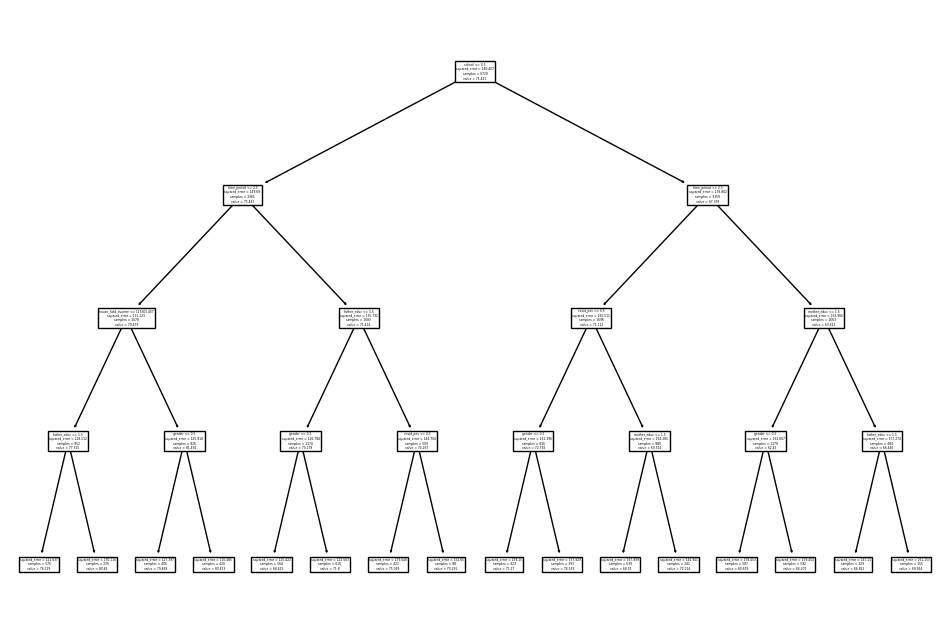

In [77]:
print('MATH SL SCORE')

# Using the best params to retrain on the training set and evaluating the test set
decision_tree_regressor_w_best_params = DecisionTreeRegressor(max_depth = 5, criterion = 'squared_error')

decision_tree_regressor_w_best_params.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(decision_tree_regressor_w_best_params, feature_names=[
    'school', 'grade_level', 'gender', 'covid_pos', 'house_hold_income', 'free_lunch', 
    'num_computers', 'family_size', 'father_educ', 'mother_educ', 'time_period'])
plt.savefig('decision_tree_plot_mathSL_score.png', format='png', dpi=300)

In [78]:
# predictions on the test set
y_pred = decision_tree_regressor_w_best_params.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 153.1088156684973
Mean Absolute Error: 10.296820177616649
R² Score: 0.208157008546203
